C:\Users\janic\AppData\Local\Temp\ipykernel_45360\558040712.py:17: RankWarning: Polyfit may be poorly conditioned
  male_coeffs = np.polyfit(age_midpoints, male_medians, 9)


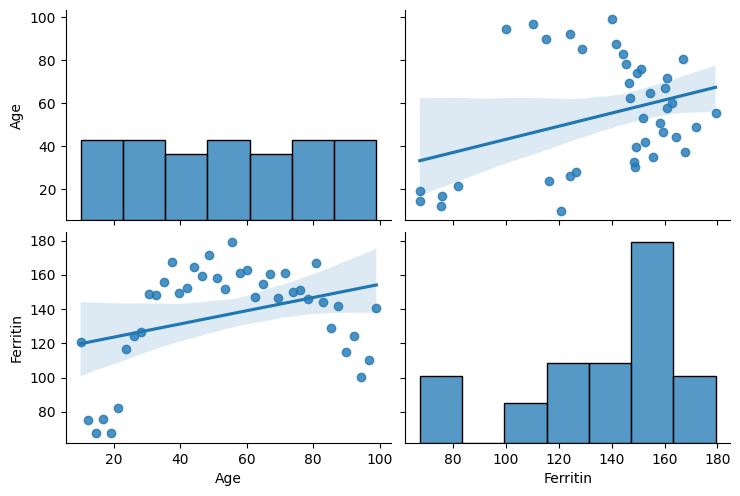

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Provided data
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59',
              '60-69', '70-79', '80-89', '90-99']
male_medians = [60, 110, 160, 170, 165, 160, 155, 140, 120]

# Convert age_labels to numeric values (midpoint of each range)
age_midpoints = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])

# Fit quadratic (degree 2) polynomial for males to get coefficients
male_coeffs = np.polyfit(age_midpoints, male_medians, 9)

# Generate continuous age data (from 10 to 99)
continuous_ages = np.linspace(10, 99, 40)  # 100 data points between 10 and 99

# Simulate real data points (with noise) based on the quadratic equation
noise_level = 10  # Standard deviation of the noise added to the data
simulated_data = np.polyval(male_coeffs, continuous_ages) + np.random.normal(0, noise_level, size=len(continuous_ages))

# Create a DataFrame for formula interface
data = pd.DataFrame({
    'Age': continuous_ages,
    'Ferritin': simulated_data
})

sns.pairplot(data, kind='reg', height=2.5, aspect=1.5)

data.to_csv("ferritin_polynomialregression.csv", index=False)

In [95]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 1000

# Simulate independent variables
age = np.random.normal(70, 8, n)  # Age with mean 70 and standard deviation 8
education = np.random.normal(14, 3, n)  # Education level in years with mean 14 and standard deviation 3
apoe4 = np.random.choice([0, 1], n, p=[0.8, 0.2])  # APOE4 gene status (0 = no, 1 = yes)
cognitive_score = np.random.normal(27, 4, n)  # Cognitive test score with mean 27 and standard deviation 4

# Simulate the dependent variable (binary outcome: Alzheimer's disease)
# Using a logistic function to create a binary outcome based on the independent variables
log_odds = 0.06 * age - 0.1 * education + 1.2 * apoe4 - 0.1 * cognitive_score - 3
probabilities = 1 / (1 + np.exp(-log_odds))
alzheimers = np.random.binomial(1, probabilities)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Education': education,
    'APOE4': apoe4,
    'Cognitive_Score': cognitive_score,
    'Alzheimers': alzheimers
})

# Display the first few rows of the DataFrame
data.to_csv("alzheimer_logisticregression.csv", index=False)

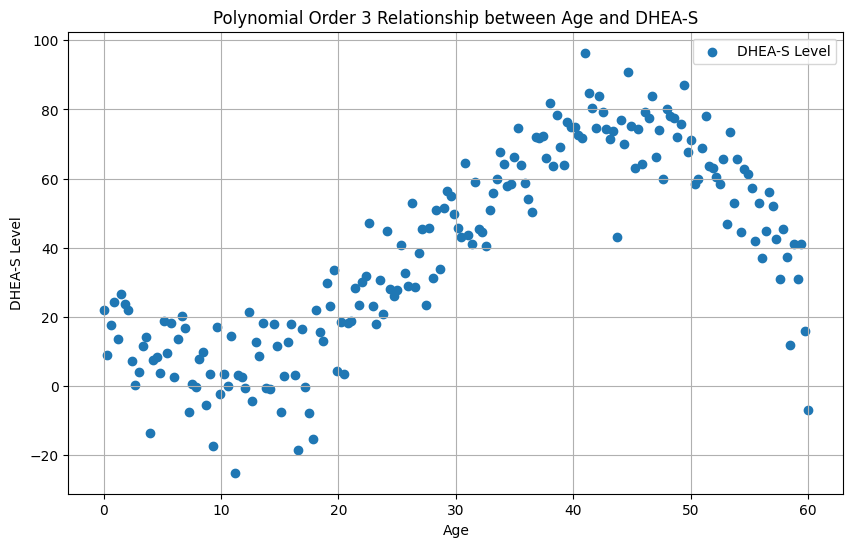

In [96]:

import numpy as np
import matplotlib.pyplot as plt

# Define the coefficients for the cubic polynomial
a = -0.0032  # More negative to enhance the cubic effect
b = 0.26  # Positive to create the middle plateau and increase
c = -4      # More negative to control the initial increase
d = 20       # Intercept to set the baseline amyloid level

# Generate age values from 0 to 100
age = np.linspace(0, 60, 200)

# Calculate amyloid levels using the cubic polynomial
DHEAS = a * age**3 + b * age**2 + c * age + d + np.random.normal(0, 10, 200)



# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'DHEAS': DHEAS
})

# Display the first few rows of the DataFrame
data.to_csv("DHEA-S_hormone_age.csv", index=False)


# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(age, DHEAS, label='DHEA-S Level')
plt.title('Polynomial Order 3 Relationship between Age and DHEA-S')
plt.xlabel('Age')
plt.ylabel('DHEA-S Level')
plt.legend()
plt.grid(True)
plt.show()





In [121]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 250

# Simulate independent variables
age = np.random.normal(60, 10, n)  # Age with mean 60 and standard deviation 10
gender = np.random.choice([0, 1], n, p=[0.5, 0.5])  # 0 = Female, 1 = Male
family_history = np.random.choice([0, 1], n, p=[0.85, 0.15])  # 0 = No family history, 1 = Yes family history
motor_function_score = np.random.normal(30, 5, n)  # Motor function score, typically between 0 and 40, mean 30 and std 5
smoking_history = np.random.choice([0, 1], n, p=[0.7, 0.3])  # 0 = No smoking, 1 = Smoking history
c9orf72_mutation = np.random.choice([0, 1], n, p=[0.95, 0.05])  # 0 = No, 1 = Yes (genetic mutation)

# Simulate the dependent variable (binary outcome: ALS)
# Using a logistic function to create a binary outcome based on the independent variables
log_odds = -5 + 0.07 * age + 0.5 * gender + 2.2 * family_history - 0.1 * motor_function_score + 0.001 * smoking_history + 2.8 * c9orf72_mutation
probabilities = 1 / (1 + np.exp(-log_odds))  # Convert log odds to probabilities
als_outcome = np.random.binomial(1, probabilities)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Family_History': family_history,
    'Motor_Function_Score': motor_function_score,
    'Smoking_History': smoking_history,
    'C9orf72_Mutation': c9orf72_mutation,
    'ALS': als_outcome
})

# Display the first few rows of the DataFrame
data.head()

data.to_csv("ALS_regression.csv", index=False)


In [6]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_patients = 120
age = np.random.randint(40, 80, size=n_patients)
therapy_intensity = np.random.randint(1, 6, size=n_patients)
baseline_score = np.random.normal(50, 10, size=n_patients)

# Cognitive score (target)
noise = np.random.normal(0, 8, size=n_patients)
cognitive_score = 0.5 * age + therapy_intensity**2 + noise

df = pd.DataFrame({
    "age": age,
    "therapy_intensity": therapy_intensity,
    "baseline_score": baseline_score,
    "cognitive_score_after": cognitive_score
})

df.head()
data.to_csv("therapy_influence_regression.csv", index=False)